In [6]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$E(X)=\frac{(0+b)}{2}=\frac{b}{2}$
Since $E(X)$ is a linear operator, $$E(2\bar{X})=2 E(\bar{X})= 2 E\bigg{(}\frac{\sum{x_i}}{n}\bigg{)}\implies\frac{2}{n} \sum_{i=1}^{n}{E(x_i)}=\frac{2}{n} \frac{n b}{2}=b$$

We conclude the estimate is not biased as $E(b_{MoM})=E(2\bar{X})=b$

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

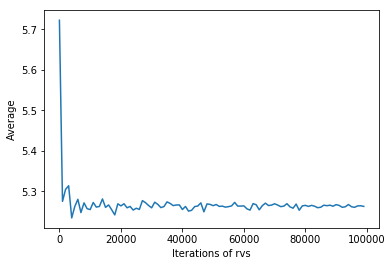

In [48]:
#Should get a bias here...
iterations=np.arange(1,100000,1000) #This is going to take a while..... strap in
Distribution=[]
for number in np.arange(len(iterations)):
    Sample=[]
    for a in np.arange(iterations[number]):
        Sample=np.append(Sample,1/np.mean(stats.expon.rvs(scale=1/5,size=20)))
    Distribution=np.append(Distribution,np.mean(Sample))
plt.plot(iterations,Distribution)
plt.xlabel('Iterations of rvs');
plt.ylabel('Average');

In [50]:
np.mean(Distribution)

5.268426337112461

As we can see, $\frac{1}{\mu}\neq 5$. 

It actually ends up approaching $5.25$. Another way to write this, is $\frac{1}{\bar{X}}=\lambda+\frac{\lambda-1}{\lambda}$. Therefore, we conclude the estimate is biased.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

$$lim_{n\to \infty}Var(\bar{X}_n)=lim_{n\to \infty}\frac{b^2}{12} \implies lim_{n\to \infty}\frac{(2\bar{X})^2}{12}$$
$$=lim_{n\to \infty}\frac{(\bar{X})^2}{3}=lim_{n\to \infty}\frac{(\sum_{i=1}^{\text{n samples}}{x_i})^2}{3n^2}=0$$

If not seen easily, the variance is $\frac{b^2}{12}$, and based off of the result of the limit, we see that a $n$ increases, the variance decreases to zero. 

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$$lim_{n\to \infty}Var(\bar{X}_n)\implies lim_{n\to \infty}\frac{\sum{(\bar{X}_i-\mu)}^2}{n} =0$$
By inspection, we see that this limit approaches zero and is consistent.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

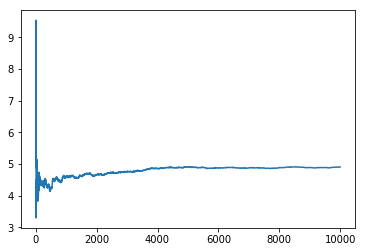

In [20]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()

Doc state: Coen Williams helped me understand how to even approach problem 3